In [7]:
import geopandas as gpd
import stormcatchments as sc
import fiona
import matplotlib.pyplot as plt
import contextily as cx

In [32]:
drainage_network_path  = "K:\\DataServices\\Projects\\Current_Projects\\Environment\\MS4\\Data\\Spatial\\Drainage_Network"

muni = 'Natick'

print('Starting on municipality: ', muni)

#read in municipalities, select the one of interest
#municipalities
munis_fp = "K:\\\DataServices\\Datasets\\Boundaries\\Spatial\\mapc_towns_poly.shp"
munis = gpd.read_file(munis_fp)


#select just the muni 
muni_shp = munis.loc[munis['municipal'] == muni]

Starting on municipality:  Natick


In [12]:
#natick
natick_path = drainage_network_path + '\\Natick Stormwater\\mrged.gdb'
natick_nodes = gpd.read_file (natick_path, layer = 'd_nodes')
natick_pipes = gpd.read_file (natick_path, layer = 'd_pipes')

#reproject all to mass mainland
mass_mainland_crs = "EPSG:26986"
natick_nodes = natick_nodes.to_crs(mass_mainland_crs)
natick_pipes = natick_pipes.to_crs(mass_mainland_crs)

In [18]:
natick_pipes = natick_pipes.explode()

C:\Users\rbowers\AppData\Local\Temp\ipykernel_27360\1742268449.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  natick_pipes = natick_pipes.explode()


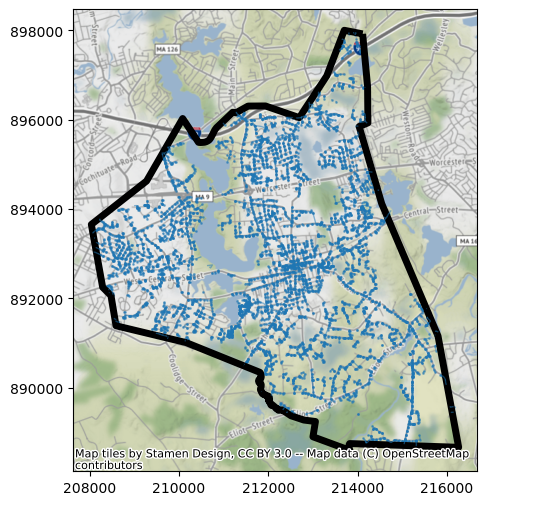

In [36]:
fig, ax = plt.subplots(figsize=(6,6))
natick_nodes.plot(ax=ax, alpha=0.5, markersize=1)
natick_pipes.plot(ax=ax, alpha=0.5, linewidth=1)
muni_shp.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=5)

#use contextily to add a basemap
cx.add_basemap(ax, crs=natick_nodes.crs)

In [43]:
if natick_nodes.geomtype == 'point':
    return True

SyntaxError: 'return' outside function (526539331.py, line 2)